## **Unit committment**
Source Credit:Merit India

In [2]:
import sys
try:
    import docplex.mp
except:
    raise Exception('Please install docplex. See https://pypi.org/project/docplex/')

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
from pandas import DataFrame, Series

# make matplotlib plots appear inside the notebook
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 11, 5 ############################ <-Use this to change the plot

In [5]:
df=pd.read_excel(r"F:\IBM\git\Load_despatch_power_system\Uttar_pradesh\Up_data.xlsx",sheet_name='Gendata')
df

,unit,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost
0,p1,Hydro,81.0,49.50,90,81.0,4,4,13.50,12.150,0.32,0.41
1,p2,Hydro,63.0,38.50,70,63.0,4,4,10.50,9.450,0.45,0.44
2,p3,Hydro,27.0,16.50,30,27.0,4,4,4.50,4.050,0.23,0.57
3,p4,Hydro,225.0,137.50,250,225.0,4,4,37.50,33.750,0.19,0.73
4,p5,Hydro,42.3,25.85,47,42.3,4,4,7.05,6.345,0.86,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...
77,p78,Gas,235.8,144.10,262,235.8,4,4,39.30,35.370,0.00,11.55
78,p79,Gas,210.6,128.70,234,210.6,4,4,35.10,31.590,0.00,13.56
79,p80,Gas,101.7,62.15,113,101.7,4,4,16.95,15.255,0.00,13.60
80,p81,Gas,235.8,144.10,262,235.8,4,4,39.30,35.370,0.00,17.61


In [6]:
df.energy.unique()

array(['Hydro', 'Thermal', 'Gas', 'Nuclear'], dtype=object)

In [7]:
df['must_run_status']=np.where(df.energy.isin(['Hydro','Nuclear']),1,0)

In [8]:
df.head()

,unit,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost,must_run_status
0,p1,Hydro,81.0,49.50,90,81.0,4,4,13.50,12.150,0.32,0.41,1
1,p2,Hydro,63.0,38.50,70,63.0,4,4,10.50,9.450,0.45,0.44,1
2,p3,Hydro,27.0,16.50,30,27.0,4,4,4.50,4.050,0.23,0.57,1
3,p4,Hydro,225.0,137.50,250,225.0,4,4,37.50,33.750,0.19,0.73,1
4,p5,Hydro,42.3,25.85,47,42.3,4,4,7.05,6.345,0.86,0.94,1


In [9]:
re_total=(df[['initial']].sum(axis=1).where(df['must_run_status'] ==1, 0)).sum()

In [10]:
re_total

3355.2

In [11]:
df_units=df.copy()

In [12]:
df_units=df_units[df_units['must_run_status']==0]

In [13]:
df_units.shape

(54, 13)

In [14]:
df_units.head()

,unit,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost,must_run_status
11,p12,Thermal,418.5,255.75,465,418.5,4,4,69.75,62.775,0.17,1.62,0
12,p13,Thermal,510.3,311.85,567,510.3,4,4,85.05,76.545,0.72,1.74,0
13,p14,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,0.44,1.74,0
14,p15,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,1.56,1.76,0
15,p16,Thermal,315.9,193.05,351,315.9,4,4,52.65,47.385,1.44,1.77,0


In [15]:
must_run = df[df['must_run_status']==1]['unit']
non_must_run=df_units[df_units['must_run_status']==0]['unit']
all_units = df_units.unit
        





In [16]:
df_units.set_index('unit',inplace=True)


In [17]:
df_up=df_units
df_up.head()

,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost,must_run_status
unit,,,,,,,,,,,,
p12,Thermal,418.5,255.75,465,418.5,4,4,69.75,62.775,0.17,1.62,0
p13,Thermal,510.3,311.85,567,510.3,4,4,85.05,76.545,0.72,1.74,0
p14,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,0.44,1.74,0
p15,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,1.56,1.76,0
p16,Thermal,315.9,193.05,351,315.9,4,4,52.65,47.385,1.44,1.77,0


In [18]:
df_up.fillna(0,inplace=True)

In [19]:
df_up.head()

,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost,must_run_status
unit,,,,,,,,,,,,
p12,Thermal,418.5,255.75,465,418.5,4,4,69.75,62.775,0.17,1.62,0
p13,Thermal,510.3,311.85,567,510.3,4,4,85.05,76.545,0.72,1.74,0
p14,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,0.44,1.74,0
p15,Thermal,810.0,495.00,900,810.0,4,4,135.00,121.500,1.56,1.76,0
p16,Thermal,315.9,193.05,351,315.9,4,4,52.65,47.385,1.44,1.77,0


In [20]:


raw_demand = pd.read_excel(r"F:\IBM\git\Load_despatch_power_system\Uttar_pradesh\Up_data.xlsx",sheet_name='demand',index_col='Block')
raw_demand.isna().sum()

Current_demand      0
Yesterday_demand    6
dtype: int64

In [21]:
# raw_demand.interpolate(inplace=True)
raw_demand.fillna(raw_demand['Current_demand'].mean(),inplace=True)

<AxesSubplot:title={'center':'Demand'}>

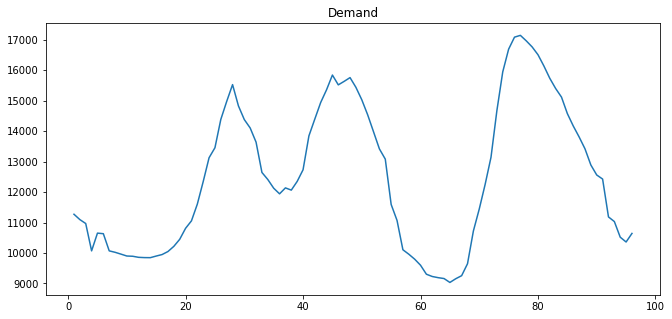

In [22]:
nb_periods = len(raw_demand)
demand = Series(raw_demand['Current_demand'], index = range(1, nb_periods+1))

# plot demand
demand.plot(title="Demand")

In [23]:
demand=demand-re_total

<AxesSubplot:>

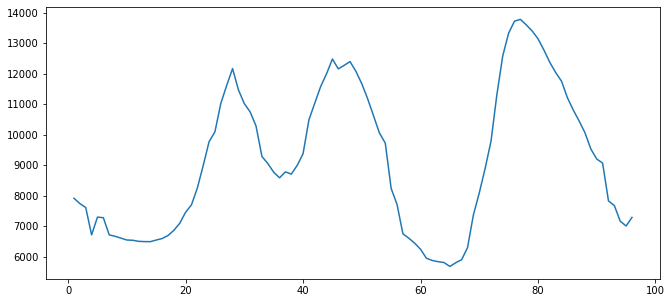

In [24]:
demand.plot()

In [25]:
from docplex.mp.model import Model

ucpm = Model("ucp")

In [26]:
units = all_units
# periods range from 1 to nb_periods included
periods = range(1, nb_periods+1)

# in use[u,t] is true iff unit u is in production at period t
in_use = ucpm.binary_var_matrix(keys1=units, keys2=periods, name="in_use")

# true if unit u is turned on at period t
turn_on = ucpm.binary_var_matrix(keys1=units, keys2=periods, name="turn_on")

# true if unit u is switched off at period t
# modeled as a continuous 0-1 variable, more on this later
turn_off = ucpm.continuous_var_matrix(keys1=units, keys2=periods, lb=0, ub=1, name="turn_off")

# production of energy for unit u at period t
production = ucpm.continuous_var_matrix(keys1=units, keys2=periods, name="p")

# at this stage we have defined the decision variables.
ucpm.print_information()

Model: ucp
 - number of variables: 20736
   - binary=10368, integer=0, continuous=10368
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [27]:
# Organize all decision variables in a DataFrame indexed by 'units' and 'periods'
df_decision_vars = DataFrame({'in_use': in_use, 'turn_on': turn_on, 'turn_off': turn_off, 'production': production})
# Set index names
df_decision_vars.index.names=['unit', 'periods']

# Display first few rows of 'df_decision_vars' DataFrame
df_decision_vars.head()

in_use        turn_on        turn_off production
unit periods                                                        
p12  1        in_use_p12_1  turn_on_p12_1  turn_off_p12_1    p_p12_1
     2        in_use_p12_2  turn_on_p12_2  turn_off_p12_2    p_p12_2
     3        in_use_p12_3  turn_on_p12_3  turn_off_p12_3    p_p12_3
     4        in_use_p12_4  turn_on_p12_4  turn_off_p12_4    p_p12_4
     5        in_use_p12_5  turn_on_p12_5  turn_off_p12_5    p_p12_5

In [28]:
# Create a join between 'df_decision_vars' and 'df_up' Data Frames based on common index id (ie: 'units')
# In 'df_up', one keeps only relevant columns: 'min_gen' and 'max_gen'
df_join_decision_vars_up = df_decision_vars.join(df_up[['min_gen', 'max_gen']], how='inner')

# Display first few rows of joined Data Frames
df_join_decision_vars_up.head()

in_use        turn_on        turn_off production  min_gen  \
unit periods                                                                    
p12  1        in_use_p12_1  turn_on_p12_1  turn_off_p12_1    p_p12_1   255.75   
     2        in_use_p12_2  turn_on_p12_2  turn_off_p12_2    p_p12_2   255.75   
     3        in_use_p12_3  turn_on_p12_3  turn_off_p12_3    p_p12_3   255.75   
     4        in_use_p12_4  turn_on_p12_4  turn_off_p12_4    p_p12_4   255.75   
     5        in_use_p12_5  turn_on_p12_5  turn_off_p12_5    p_p12_5   255.75   

              max_gen  
unit periods           
p12  1            465  
     2            465  
     3            465  
     4            465  
     5            465

In [29]:
for item in df_join_decision_vars_up.itertuples(index=False):
        ucpm += (item.production <= item.max_gen * item.in_use)
        ucpm += (item.production >= item.min_gen * item.in_use)
        

In [30]:
# # When in use, the production level is constrained to be between min and max generation.
# for item in df_join_decision_vars_up.itertuples(index=False):
#     ucpm += (item.production <= item.max_gen * item.in_use)
#     ucpm += (item.production >= item.min_gen * item.in_use)

In [31]:
# Initial state
# If initial production is nonzero, then period #1 is not a turn_on
# else turn_on equals in_use
# Dual logic is implemented for turn_off
for u in units:
    if df_up.initial[u] > 0:
        # if u is already running, not starting up
        ucpm.add_constraint(turn_on[u, 1] == 0)
        # turnoff iff not in use
        ucpm.add_constraint(turn_off[u, 1] + in_use[u, 1] == 1)
    else:
        # turn on at 1 iff in use at 1
        ucpm.add_constraint(turn_on[u, 1] == in_use[u, 1])
        # already off, not switched off at t==1
        ucpm.add_constraint(turn_off[u, 1] == 0)
ucpm.print_information()

Model: ucp
 - number of variables: 20736
   - binary=10368, integer=0, continuous=10368
 - number of constraints: 10476
   - linear=10476
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [32]:
# Use groupby operation to process each unit
for unit, r in df_decision_vars.groupby(level='unit'):
    u_ramp_up = df_up.ramp_up[unit]
    u_ramp_down = df_up.ramp_down[unit]
    u_initial = df_up.initial[unit]
    # Initial ramp up/down
    # Note that r.production is a Series that can be indexed as an array (ie: first item index = 0)
    ucpm.add_constraint(r.production[0] - u_initial <= u_ramp_up)
    ucpm.add_constraint(u_initial - r.production[0] <= u_ramp_down)
    for (p_curr, p_next) in zip(r.production, r.production[1:]):
        ucpm.add_constraint(p_next - p_curr <= u_ramp_up)
        ucpm.add_constraint(p_curr - p_next <= u_ramp_down)

ucpm.print_information()

Model: ucp
 - number of variables: 20736
   - binary=10368, integer=0, continuous=10368
 - number of constraints: 20844
   - linear=20844
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [33]:

# Turn_on, turn_off
# Use groupby operation to process each unit
for unit, r in df_decision_vars.groupby(level='unit'):
    for (in_use_curr, in_use_next, turn_on_next, turn_off_next) in zip(r.in_use, r.in_use[1:], r.turn_on[1:], r.turn_off[1:]):
        # if unit is off at time t and on at time t+1, then it was turned on at time t+1
        ucpm.add_constraint(in_use_next - in_use_curr <= turn_on_next)

        # if unit is on at time t and time t+1, then it was not turned on at time t+1
        # mdl.add_constraint(in_use_next + in_use_curr + turn_on_next <= 2)

        # if unit is on at time t and off at time t+1, then it was turned off at time t+1
        ucpm.add_constraint(in_use_curr - in_use_next + turn_on_next == turn_off_next)
ucpm.print_information()        

Model: ucp
 - number of variables: 20736
   - binary=10368, integer=0, continuous=10368
 - number of constraints: 31104
   - linear=31104
 - parameters: defaults
 - objective: none
 - problem type is: MILP


In [34]:
# Minimum uptime, downtime
for unit, r in df_decision_vars.groupby(level='unit'):
    min_uptime   = df_up.min_uptime[unit]
    min_downtime = df_up.min_downtime[unit]
    # Note that r.turn_on and r.in_use are Series that can be indexed as arrays (ie: first item index = 0)
    for t in range(min_uptime, nb_periods):
        ctname = "min_up_{0!s}_{1}".format(*r.index[t])
        ucpm.add_constraint(ucpm.sum(r.turn_on[(t - min_uptime) + 1:t + 1]) <= r.in_use[t], ctname)

    for t in range(min_downtime, nb_periods):
        ctname = "min_down_{0!s}_{1}".format(*r.index[t])
        ucpm.add_constraint(ucpm.sum(r.turn_off[(t - min_downtime) + 1:t + 1]) <= 1 - r.in_use[t], ctname)


In [35]:
# Enforcing demand
# we use a >= here to be more robust, 
# objective will ensure  we produce efficiently
for period, r in df_decision_vars.groupby(level='periods'):
    total_demand = demand[period]
    ctname = "ct_meet_demand_%d" % period
    ucpm.add_constraint(ucpm.sum(r.production) >= total_demand, ctname) 

In [36]:
# Create a join between 'df_decision_vars' and 'df_up' Data Frames based on common index ids (ie: 'units')
# In 'df_up', one keeps only relevant columns: 'fixed_cost', 'variable_cost', 'start_cost' and 'co2_cost'
df_join_obj = df_decision_vars.join(
    df_up[['fixed_cost', 'variable_cost']], how='inner')

# Display first few rows of joined Data Frame
df_join_obj.head()

in_use        turn_on        turn_off production  \
unit periods                                                           
p12  1        in_use_p12_1  turn_on_p12_1  turn_off_p12_1    p_p12_1   
     2        in_use_p12_2  turn_on_p12_2  turn_off_p12_2    p_p12_2   
     3        in_use_p12_3  turn_on_p12_3  turn_off_p12_3    p_p12_3   
     4        in_use_p12_4  turn_on_p12_4  turn_off_p12_4    p_p12_4   
     5        in_use_p12_5  turn_on_p12_5  turn_off_p12_5    p_p12_5   

              fixed_cost  variable_cost  
unit periods                             
p12  1              0.17           1.62  
     2              0.17           1.62  
     3              0.17           1.62  
     4              0.17           1.62  
     5              0.17           1.62

In [37]:
# objective
total_fixed_cost = ucpm.sum(df_join_obj.in_use * df_join_obj.fixed_cost)
total_variable_cost = ucpm.sum(df_join_obj.production * df_join_obj.variable_cost)
# total_startup_cost = ucpm.sum(df_join_obj.turn_on * df_join_obj.start_cost)
# total_co2_cost = ucpm.sum(df_join_obj.production * df_join_obj.co2_cost)
total_economic_cost = total_fixed_cost + total_variable_cost 

total_nb_used = ucpm.sum(df_decision_vars.in_use)
total_nb_starts = ucpm.sum(df_decision_vars.turn_on)

# store expression kpis to retrieve them later.
ucpm.add_kpi(total_fixed_cost   , "Total Fixed Cost")
ucpm.add_kpi(total_variable_cost, "Total Variable Cost")
# ucpm.add_kpi(total_startup_cost , "Total Startup Cost")
ucpm.add_kpi(total_economic_cost, "Total Economic Cost")
# ucpm.add_kpi(total_co2_cost     , "Total CO2 Cost")
ucpm.add_kpi(total_nb_used, "Total #used")
ucpm.add_kpi(total_nb_starts, "Total #starts")

# minimize sum of all costs
ucpm.minimize(total_fixed_cost + total_variable_cost )

In [38]:
ucpm.print_information()

Model: ucp
 - number of variables: 20736
   - binary=10368, integer=0, continuous=10368
 - number of constraints: 41136
   - linear=41136
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP


In [39]:
assert ucpm.solve(), "!!! Solve of the model fails"

In [40]:
ucpm.report()

* model ucp solved with objective = 3708334.574
*  KPI: Total Fixed Cost    = 6315.840
*  KPI: Total Variable Cost = 3702018.734
*  KPI: Total Economic Cost = 3708334.574
*  KPI: Total #used         = 5184.000
*  KPI: Total #starts       = 0.000


In [41]:
df_prods = df_decision_vars.production.apply(lambda v: v.solution_value).unstack(level='unit')
df_used = df_decision_vars.in_use.apply(lambda v: v.solution_value).unstack(level='unit')
df_started = df_decision_vars.turn_on.apply(lambda v: v.solution_value).unstack(level='unit')

# Display the first few rows of the pivoted 'production' data
df_prods.head()

unit,p12,p13,p14,p15,p16,p17,p18,p20,p22,p23,...,p72,p73,p74,p76,p77,p78,p79,p80,p81,p82
periods,,,,,,,,,,,,,,,,,,,,,
1,355.725,433.755,688.5,688.5,268.515,260.1,247.095,598.23,826.2,123.165,...,51.255,76.5,104.805,86.445,179.01,200.43,179.01,86.445,200.43,18.36
2,292.950,357.210,567.0,567.0,221.130,214.2,203.490,492.66,680.4,101.430,...,42.210,63.0,86.310,71.190,147.42,165.06,147.42,71.190,165.06,16.80
3,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,36.850,55.0,75.350,62.150,128.70,144.10,128.70,62.150,144.10,16.80
4,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,36.850,55.0,75.350,62.150,128.70,144.10,128.70,62.150,144.10,16.80
5,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,36.850,55.0,75.350,62.150,128.70,144.10,128.70,62.150,144.10,16.80


In [42]:
df.head()

,unit,energy,initial,min_gen,max_gen,operating_max_gen,min_uptime,min_downtime,ramp_up,ramp_down,fixed_cost,variable_cost,must_run_status
0,p1,Hydro,81.0,49.50,90,81.0,4,4,13.50,12.150,0.32,0.41,1
1,p2,Hydro,63.0,38.50,70,63.0,4,4,10.50,9.450,0.45,0.44,1
2,p3,Hydro,27.0,16.50,30,27.0,4,4,4.50,4.050,0.23,0.57,1
3,p4,Hydro,225.0,137.50,250,225.0,4,4,37.50,33.750,0.19,0.73,1
4,p5,Hydro,42.3,25.85,47,42.3,4,4,7.05,6.345,0.86,0.94,1


In [43]:
mustrun=df[df['must_run_status']==1][['unit','operating_max_gen']]

In [44]:
mustrun.set_index('unit',inplace=True)

In [45]:
mustrun=mustrun.transpose()

In [46]:
mustrun=pd.concat([mustrun]*96)

In [47]:
mustrun.set_index(np.arange(1,97,1),inplace=True)

In [48]:
mustrun

unit,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p37,p38,p40,p42,p46,p50,p54,p59,p66,p75
1,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
2,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
3,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
4,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
5,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
93,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
94,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
95,81.0,63.0,27.0,225.0,42.3,356.4,85.5,73.8,97.2,248.4,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1


In [49]:
output=pd.merge(df_prods,mustrun,left_index=True,right_index=True)

In [50]:
output

unit,p12,p13,p14,p15,p16,p17,p18,p20,p22,p23,...,p37,p38,p40,p42,p46,p50,p54,p59,p66,p75
periods,,,,,,,,,,,,,,,,,,,,,
1,355.725,433.755,688.5,688.5,268.515,260.1,247.095,598.23,826.2,123.165,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
2,292.950,357.210,567.0,567.0,221.130,214.2,203.490,492.66,680.4,101.430,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
3,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
4,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
5,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
93,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1
94,255.750,311.850,495.0,495.0,193.050,187.0,177.650,430.10,594.0,88.550,...,63.9,40.5,152.1,153.9,30.6,96.3,261.0,129.6,63.0,89.1


In [51]:
output.sum(axis=1)

periods
1     19850.895
2     16941.570
3     15218.450
4     15218.450
5     15218.450
        ...    
92    15218.450
93    15218.450
94    15218.450
95    15218.090
96    15218.810
Length: 96, dtype: float64

In [52]:
# output.to_csv('output1.csv')

In [53]:
df_spins = DataFrame(df_up.max_gen.to_dict(), index=periods) - df_prods

# Display the first few rows of the 'df_spins' Data Frame, representing the reserve for each unit, over time
df_spins.head()

,p12,p13,p14,p15,p16,p17,p18,p20,p22,p23,...,p72,p73,p74,p76,p77,p78,p79,p80,p81,p82
1,109.275,133.245,211.5,211.5,82.485,79.9,75.905,183.77,253.8,37.835,...,15.745,23.5,32.195,26.555,54.99,61.57,54.99,26.555,61.57,5.64
2,172.050,209.790,333.0,333.0,129.870,125.8,119.510,289.34,399.6,59.570,...,24.790,37.0,50.690,41.810,86.58,96.94,86.58,41.810,96.94,7.20
3,209.250,255.150,405.0,405.0,157.950,153.0,145.350,351.90,486.0,72.450,...,30.150,45.0,61.650,50.850,105.30,117.90,105.30,50.850,117.90,7.20
4,209.250,255.150,405.0,405.0,157.950,153.0,145.350,351.90,486.0,72.450,...,30.150,45.0,61.650,50.850,105.30,117.90,105.30,50.850,117.90,7.20
5,209.250,255.150,405.0,405.0,157.950,153.0,145.350,351.90,486.0,72.450,...,30.150,45.0,61.650,50.850,105.30,117.90,105.30,50.850,117.90,7.20


<AxesSubplot:xlabel='periods'>

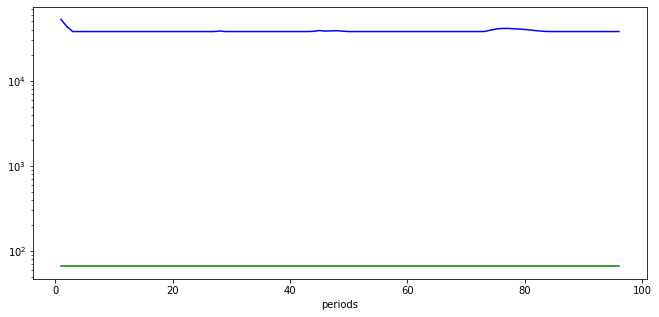

In [54]:
# extract unit cost data
all_costs = ["fixed_cost", "variable_cost"]
df_costs = df_up[all_costs]

running_cost = df_used * df_costs.fixed_cost
# startup_cost = df_started * df_costs.start_cost
variable_cost = df_prods * df_costs.variable_cost
# co2_cost = df_prods * df_costs.co2_cost
total_cost = running_cost  + variable_cost 

running_cost.sum(axis=1).plot(style='g')
# startup_cost.sum(axis=1).plot(style='r')
variable_cost.sum(axis=1).plot(style='b',logy=True)
# co2_cost.sum(axis=1).plot(style='k')

In [55]:
# df_spins.p1.plot(style='o-')

<AxesSubplot:title={'center':'Global spinning reserve'}>

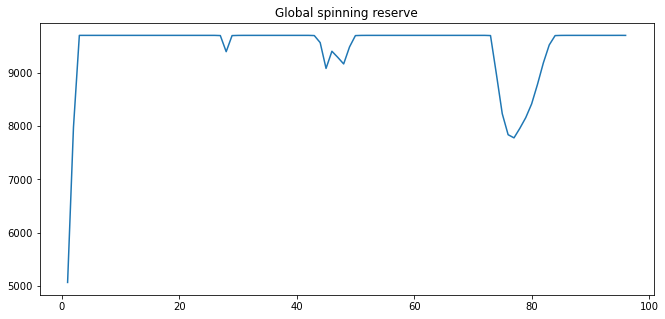

In [56]:
global_spin = df_spins.sum(axis=1)
global_spin.plot(title="Global spinning reserve")

In [57]:
# df_used.sum(axis=1).plot(title="Number of plants online", kind='line', style="r-", ylim=[0, len(units)])

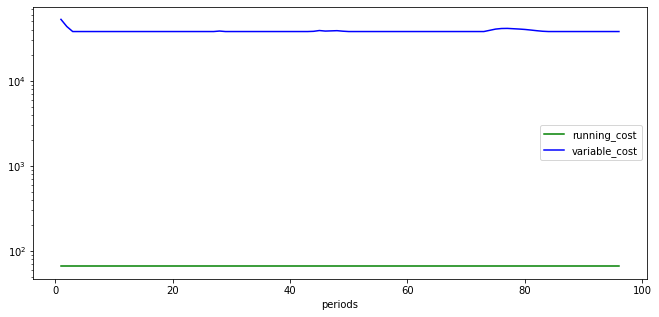

In [58]:
# extract unit cost data
all_costs = ["fixed_cost", "variable_cost"]
df_costs = df_up[all_costs]

running_cost = df_used * df_costs.fixed_cost
# startup_cost = df_started * df_costs.start_cost
variable_cost = df_prods * df_costs.variable_cost
# co2_cost = df_prods * df_costs.co2_cost
total_cost = running_cost  + variable_cost 

running_cost.sum(axis=1).plot(style='g',label='running_cost')
# startup_cost.sum(axis=1).plot(style='r',label='start_up cost')
variable_cost.sum(axis=1).plot(style='b',logy=True,label='variable_cost')
# co2_cost.sum(axis=1).plot(style='k',label='CO2_cost')
plt.legend()
plt.show()

Text(0.5, 1.0, 'total cost by energy type')

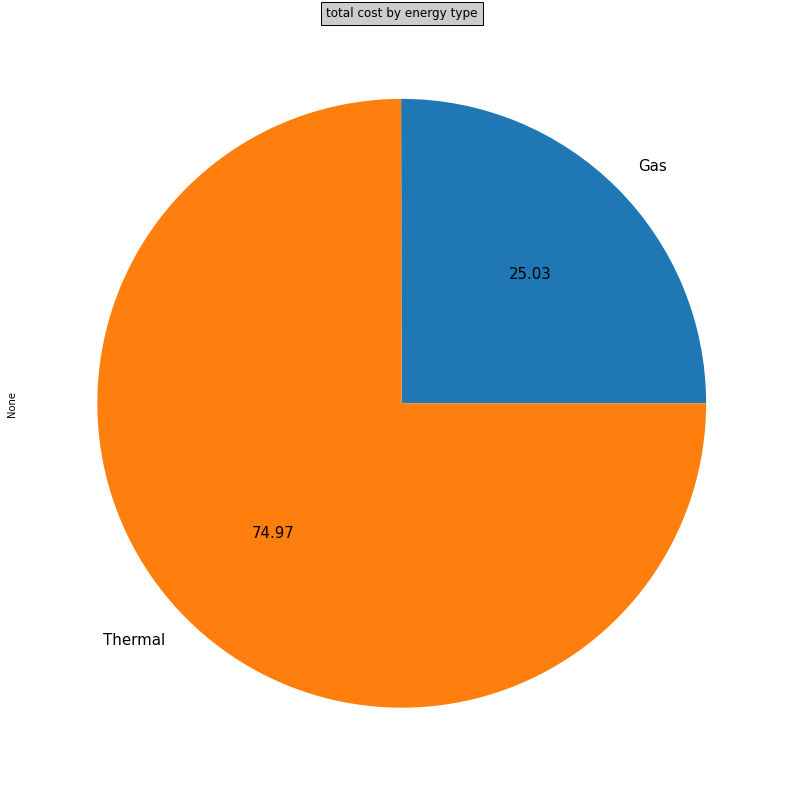

In [59]:
# Calculate sum by column (by default, axis = 0) to get total cost for each unit
cost_by_unit = total_cost.sum()

# Create a dictionary storing energy type for each unit, from the corresponding pandas Series
unit_energies = df_up.energy.to_dict()

# Group cost by unit type and plot total cost by energy type in a pie chart
gb = cost_by_unit.groupby(unit_energies)
# gb.sum().plot(kind='pie')
gb.sum().plot.pie(figsize=(14, 14),autopct='%.2f',fontsize=15)

plt.title('total cost by energy type', bbox={'facecolor':'0.8', 'pad':5})

In [60]:
# df_prods.to_csv("F:\IBM\git\Load_despatch_power_system\output1.csv")

In [63]:
output.transpose().head()

periods,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
unit,,,,,,,,,,,,,,,,,,,,,
p12,355.725,292.95,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75,...,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75
p13,433.755,357.21,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85,...,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85
p14,688.500,567.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,...,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
p15,688.500,567.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,...,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
p16,268.515,221.13,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05,...,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05


In [92]:
output1=output.transpose().reset_index()

In [93]:
output1.head()

periods,unit,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,p12,355.725,292.95,255.75,255.75,255.75,255.75,255.75,255.75,255.75,...,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75,255.75
1,p13,433.755,357.21,311.85,311.85,311.85,311.85,311.85,311.85,311.85,...,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85,311.85
2,p14,688.500,567.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,...,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
3,p15,688.500,567.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,...,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
4,p16,268.515,221.13,193.05,193.05,193.05,193.05,193.05,193.05,193.05,...,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05,193.05


In [94]:
output1=output1.merge(df[['energy','unit']],on='unit',how='inner')

In [95]:
output1.drop(columns='unit',inplace=True)

In [103]:
output1['energy'].replace({'Thermal':'Coal'},inplace=True)

Text(0.5, 1.0, 'Fuel wise Distribution')

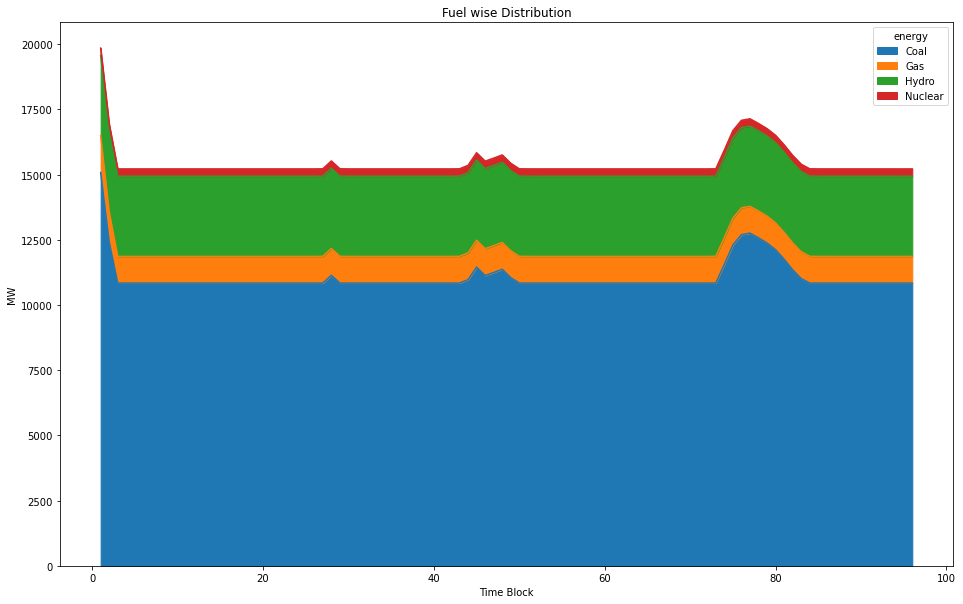

In [110]:
output1.groupby('energy').sum().transpose().plot(kind='area',figsize=(16,10))
plt.ylabel('MW')
plt.xlabel('Time Block')
plt.title('Fuel wise Distribution')